In [1]:
import numpy as np 
import numpy.random as npr
import matplotlib.pyplot as plt

### Compare NPB, PB, JK

(array([58., 28.,  8.,  3.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([6.85170748e-03, 1.92487627e+00, 3.84290084e+00, 5.76092541e+00,
        7.67894998e+00, 9.59697454e+00, 1.15149991e+01, 1.34330237e+01,
        1.53510482e+01, 1.72690728e+01, 1.91870974e+01]),
 <BarContainer object of 10 artists>)

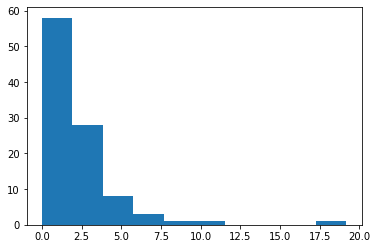

In [2]:
sample = npr.exponential(2, 100)
plt.hist(sample)

(array([ 23.,  55.,  62., 380., 151., 133., 164.,  26.,   3.,   3.]),
 array([1.96681189, 2.20242761, 2.43804334, 2.67365907, 2.90927479,
        3.14489052, 3.38050624, 3.61612197, 3.85173769, 4.08735342,
        4.32296914]),
 <BarContainer object of 10 artists>)

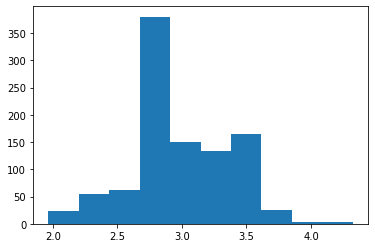

In [4]:
# NPB

samples_npb = npr.choice(sample, size=(1000, len(sample)), replace=True)
quant_npb = np.quantile(samples_npb, 0.75, axis=1)
plt.hist(quant_npb)

In [5]:
np.quantile(quant_npb, (0.025, 0.975))

array([2.29790536, 3.62694044])

In [7]:
# PB 

theta_hat = np.mean(sample)
theta_hat 

2.1918120769556557

(array([  2.,   7.,  23.,  30.,  51.,  70.,  98., 117., 130., 114., 101.,
         77.,  52.,  46.,  34.,  23.,  11.,   6.,   4.,   4.]),
 array([2.0382546 , 2.14975974, 2.26126488, 2.37277002, 2.48427515,
        2.59578029, 2.70728543, 2.81879057, 2.93029571, 3.04180085,
        3.15330599, 3.26481112, 3.37631626, 3.4878214 , 3.59932654,
        3.71083168, 3.82233682, 3.93384196, 4.04534709, 4.15685223,
        4.26835737]),
 <BarContainer object of 20 artists>)

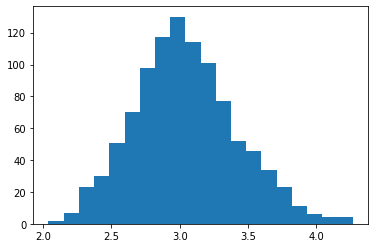

In [12]:
# PB

quant_pb = []

for i in range(1000):
    subsample = npr.exponential(theta_hat, len(sample))
    quant_pb.append(np.quantile(subsample, 0.75))

plt.hist(quant_pb, bins=20)    


In [13]:
np.quantile(quant_pb, (0.025, 0.975))

array([2.35876298, 3.79518393])

In [14]:
np.quantile(quant_npb, (0.025, 0.975))

array([2.29790536, 3.62694044])

(array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0., 74.]),
 array([2.85596566, 2.85772233, 2.859479  , 2.86123566, 2.86299233,
        2.864749  , 2.86650566, 2.86826233, 2.870019  , 2.87177566,
        2.87353233, 2.875289  , 2.87704566, 2.87880233, 2.880559  ,
        2.88231566, 2.88407233, 2.885829  , 2.88758566, 2.88934233,
        2.891099  ]),
 <BarContainer object of 20 artists>)

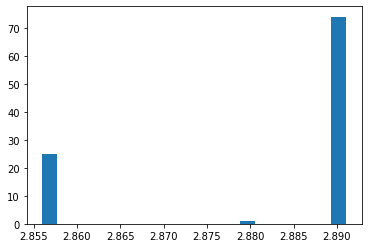

In [15]:
# JK

quant_jk = []

for i in range(len(sample)):
    subsample = np.delete(sample, i)
    quant_jk.append(np.quantile(subsample, 0.75))

plt.hist(quant_jk, bins=20)    


In [17]:
np.quantile(quant_jk, (0.025, 0.975))

array([2.85596566, 2.891099  ])

In [21]:
import pandas as pd
import statsmodels.formula.api as sm

In [20]:
# JK in regression 

n_point = 25 
x = np.linspace(1,10,25)
u = npr.normal(0,8, n_point-1)
u = np.append(u, 20)
b1=2
b2=5
y = b1 + b2*x+u

In [23]:
df = pd.DataFrame({'x':x, 'y':y})
ols = sm.ols(formula='y~x', data = df)
res = ols.fit()

In [25]:
res.conf_int()

,0,1
Intercept,-17.573355,-0.937992
x,5.209132,7.923415


(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 2., 7., 5., 2., 2., 0., 2., 0.,
        1., 1., 1.]),
 array([6.11430398, 6.15221163, 6.19011928, 6.22802693, 6.26593458,
        6.30384223, 6.34174988, 6.37965754, 6.41756519, 6.45547284,
        6.49338049, 6.53128814, 6.56919579, 6.60710344, 6.64501109,
        6.68291874, 6.72082639, 6.75873404, 6.79664169, 6.83454935,
        6.872457  ]),
 <BarContainer object of 20 artists>)

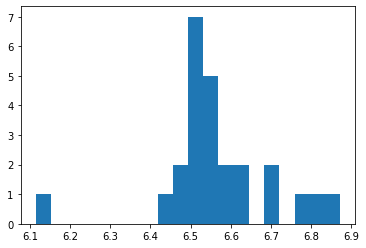

In [27]:
b2_jk = []

for i in range(len(x)):
    
    x_sub = np.delete(x, i)
    y_sub = np.delete(y, i)
    
    df_sub = pd.DataFrame({'x':x_sub, 'y':y_sub})
    ols_sub = sm.ols(formula='y~x', data = df_sub)
    res_sub = ols_sub.fit()
    
    b2_jk.append(res_sub.params[1])

plt.hist(b2_jk, bins=20)    


In [29]:
res.conf_int()

,0,1
Intercept,-17.573355,-0.937992
x,5.209132,7.923415


In [31]:
np.quantile(b2_jk, (0.025, 0.975))

array([6.31754404, 6.82705127])

### Bootstrap in Regression

In [53]:
n_point = 25 
x = np.linspace(1,10,25)
# u = npr.normal(0,8, n_point)
u = npr.exponential(10, n_point)*npr.choice([-1,1],n_point)
b1=2
b2=5
y = b1 + b2*x+u

(array([1., 0., 0., 0., 1., 2., 4., 6., 5., 6.]),
 array([-51.66778171, -45.03857274, -38.40936377, -31.7801548 ,
        -25.15094582, -18.52173685, -11.89252788,  -5.26331891,
          1.36589006,   7.99509903,  14.62430801]),
 <BarContainer object of 10 artists>)

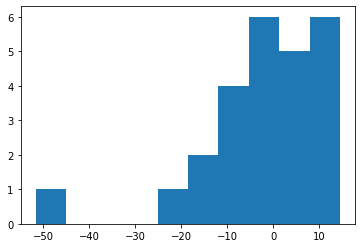

In [54]:
plt.hist(u)

In [55]:
df = pd.DataFrame({'x':x, 'y':y})
ols = sm.ols(formula='y~x', data = df)
res = ols.fit()

res.conf_int()

,0,1
Intercept,-14.813062,11.575516
x,3.075331,7.380981


In [ ]:
# Pair bootstrap

In [56]:
b1_pair = []
b2_pair = []

for i in range(1000):
    subsample = df.sample(n=n_point, replace=True)
    ols_sub = sm.ols(formula='y~x', data = subsample)
    res_sub = ols_sub.fit()
    b1_pair.append(res_sub.params[0])
    b2_pair.append(res_sub.params[1])
    

(array([  5.,  19.,  56., 136., 227., 269., 206.,  69.,  11.,   2.]),
 array([-29.09834477, -23.74015512, -18.38196547, -13.02377583,
         -7.66558618,  -2.30739653,   3.05079312,   8.40898277,
         13.76717242,  19.12536207,  24.48355171]),
 <BarContainer object of 10 artists>)

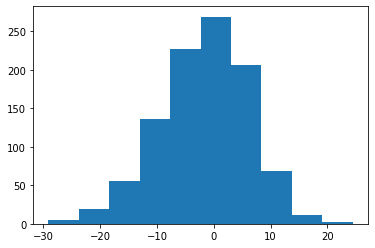

In [57]:
plt.hist(b1_pair)

(array([  2.,  18.,  67., 184., 271., 233., 139.,  57.,  25.,   4.]),
 array([1.69395847, 2.41422233, 3.13448619, 3.85475005, 4.57501391,
        5.29527777, 6.01554163, 6.73580549, 7.45606935, 8.17633321,
        8.89659707]),
 <BarContainer object of 10 artists>)

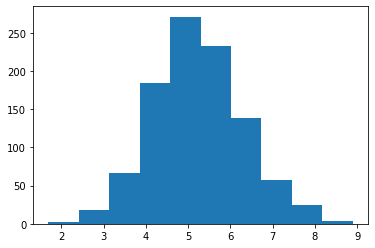

In [58]:
plt.hist(b2_pair)

In [59]:
np.quantile(b2_pair, (0.025, 0.975))

array([3.2125164 , 7.57573482])

In [60]:
res.conf_int()

,0,1
Intercept,-14.813062,11.575516
x,3.075331,7.380981
